Mount Google Drive and Set Up

In [8]:
from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set your dataset path
dataset_path = '/content/drive/MyDrive/Animal'
categories = ['Cat', 'Dog', 'Panda']


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load, Resize, Grayscale, and Label Images

In [9]:
data = []

for label, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    for img_name in tqdm(os.listdir(category_path), desc=f"Loading {category}"):
        try:
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (70, 70))
            data.append([img, label])
        except:
            continue

print(f"Total images loaded: {len(data)}")

Loading Panda: 100%|██████████| 100/100 [00:09<00:00, 10.14it/s]

Total images loaded: 300


 Visualize a modified Sample

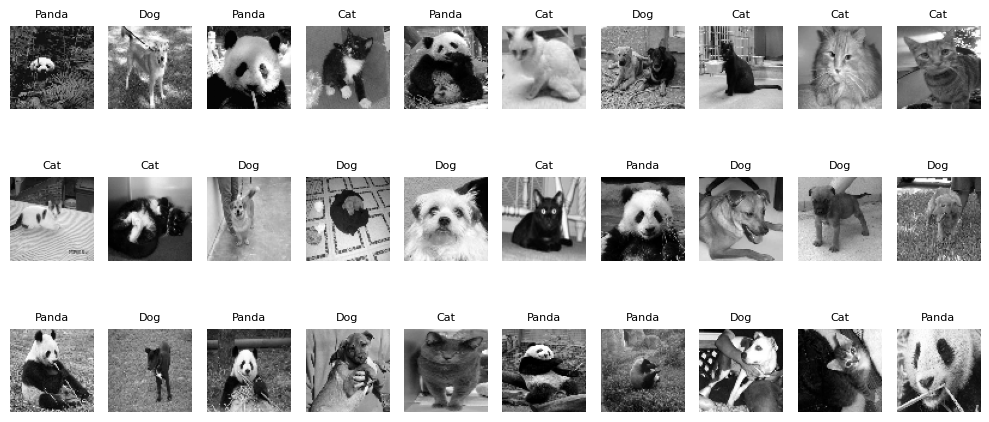

In [10]:
plt.figure(figsize=(10, 5))
random.shuffle(data)

for i in range(30):
    plt.subplot(3, 10, i + 1)
    plt.imshow(data[i][0], cmap='gray')
    plt.title(categories[data[i][1]], fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

Create 5 Manual Folds

In [11]:
random.shuffle(data)
folds = []
fold_size = len(data) // 5

for i in range(5):
    start = i * fold_size
    end = (i + 1) * fold_size if i != 4 else len(data)
    folds.append(data[start:end])

for i, fold in enumerate(folds):
    print(f"Fold {i+1}: {len(fold)} images")

Fold 1: 60 images
Fold 2: 60 images
Fold 3: 60 images
Fold 4: 60 images
Fold 5: 60 images


Define L2 Distance and KNN Logic

In [13]:
def calc_l2_distance(img1, img2):
    return np.sqrt(np.sum((img1 - img2) ** 2))

def knn_predict(train_set, test_img, k):
    distances = [(calc_l2_distance(test_img, train_img), label) for train_img, label in train_set]
    distances.sort(key=lambda x: x[0])
    top_k_labels = [label for _, label in distances[:k]]
    return max(set(top_k_labels), key=top_k_labels.count)

Evaluate KNN for All Folds and K Values

In [16]:
k_values = list(range(1, 21))
fold_accuracies = {k: [] for k in k_values}

for fold_index in range(5):
    print(f"\nEvaluating Fold {fold_index + 1}")
    validation = folds[fold_index]
    training = [img for i, fold in enumerate(folds) if i != fold_index for img in fold]

    for k in k_values:
        correct = 0
        for test_img, true_label in tqdm(validation, desc=f"K={k}"):
            pred_label = knn_predict(training, test_img, k)
            if pred_label == true_label:
                correct += 1
        accuracy = (correct / len(validation))*100
        fold_accuracies[k].append(accuracy)
        print(f"K={k} → Accuracy: {accuracy:.2f}")


Evaluating Fold 1


K=1: 100%|██████████| 60/60 [00:00<00:00, 297.22it/s]


K=1 → Accuracy: 38.33


K=2: 100%|██████████| 60/60 [00:00<00:00, 306.30it/s]


K=2 → Accuracy: 30.00


K=3: 100%|██████████| 60/60 [00:00<00:00, 313.20it/s]


K=3 → Accuracy: 28.33


K=4: 100%|██████████| 60/60 [00:00<00:00, 303.67it/s]


K=4 → Accuracy: 28.33


K=5: 100%|██████████| 60/60 [00:00<00:00, 284.67it/s]


K=5 → Accuracy: 30.00


K=6: 100%|██████████| 60/60 [00:00<00:00, 313.31it/s]


K=6 → Accuracy: 33.33


K=7: 100%|██████████| 60/60 [00:00<00:00, 316.13it/s]


K=7 → Accuracy: 30.00


K=8: 100%|██████████| 60/60 [00:00<00:00, 300.58it/s]


K=8 → Accuracy: 35.00


K=9: 100%|██████████| 60/60 [00:00<00:00, 302.00it/s]


K=9 → Accuracy: 28.33


K=10: 100%|██████████| 60/60 [00:00<00:00, 289.59it/s]


K=10 → Accuracy: 33.33


K=11: 100%|██████████| 60/60 [00:00<00:00, 245.67it/s]


K=11 → Accuracy: 31.67


K=12: 100%|██████████| 60/60 [00:00<00:00, 203.27it/s]


K=12 → Accuracy: 36.67


K=13: 100%|██████████| 60/60 [00:00<00:00, 212.25it/s]


K=13 → Accuracy: 36.67


K=14: 100%|██████████| 60/60 [00:00<00:00, 200.94it/s]


K=14 → Accuracy: 38.33


K=15: 100%|██████████| 60/60 [00:00<00:00, 220.96it/s]


K=15 → Accuracy: 38.33


K=16: 100%|██████████| 60/60 [00:00<00:00, 202.17it/s]


K=16 → Accuracy: 36.67


K=17: 100%|██████████| 60/60 [00:00<00:00, 206.22it/s]


K=17 → Accuracy: 43.33


K=18: 100%|██████████| 60/60 [00:00<00:00, 205.36it/s]


K=18 → Accuracy: 43.33


K=19: 100%|██████████| 60/60 [00:00<00:00, 209.58it/s]


K=19 → Accuracy: 45.00


K=20: 100%|██████████| 60/60 [00:00<00:00, 213.45it/s]


K=20 → Accuracy: 45.00

Evaluating Fold 2


K=1: 100%|██████████| 60/60 [00:00<00:00, 211.54it/s]


K=1 → Accuracy: 33.33


K=2: 100%|██████████| 60/60 [00:00<00:00, 197.83it/s]


K=2 → Accuracy: 31.67


K=3: 100%|██████████| 60/60 [00:00<00:00, 196.32it/s]


K=3 → Accuracy: 38.33


K=4: 100%|██████████| 60/60 [00:00<00:00, 213.70it/s]


K=4 → Accuracy: 41.67


K=5: 100%|██████████| 60/60 [00:00<00:00, 281.63it/s]


K=5 → Accuracy: 43.33


K=6: 100%|██████████| 60/60 [00:00<00:00, 305.04it/s]


K=6 → Accuracy: 38.33


K=7: 100%|██████████| 60/60 [00:00<00:00, 309.28it/s]


K=7 → Accuracy: 38.33


K=8: 100%|██████████| 60/60 [00:00<00:00, 293.23it/s]


K=8 → Accuracy: 41.67


K=9: 100%|██████████| 60/60 [00:00<00:00, 306.90it/s]


K=9 → Accuracy: 43.33


K=10: 100%|██████████| 60/60 [00:00<00:00, 289.10it/s]


K=10 → Accuracy: 43.33


K=11: 100%|██████████| 60/60 [00:00<00:00, 309.81it/s]


K=11 → Accuracy: 45.00


K=12: 100%|██████████| 60/60 [00:00<00:00, 312.02it/s]


K=12 → Accuracy: 46.67


K=13: 100%|██████████| 60/60 [00:00<00:00, 303.24it/s]


K=13 → Accuracy: 46.67


K=14: 100%|██████████| 60/60 [00:00<00:00, 310.32it/s]


K=14 → Accuracy: 50.00


K=15: 100%|██████████| 60/60 [00:00<00:00, 253.21it/s]


K=15 → Accuracy: 45.00


K=16: 100%|██████████| 60/60 [00:00<00:00, 302.64it/s]


K=16 → Accuracy: 48.33


K=17: 100%|██████████| 60/60 [00:00<00:00, 299.21it/s]


K=17 → Accuracy: 53.33


K=18: 100%|██████████| 60/60 [00:00<00:00, 300.44it/s]


K=18 → Accuracy: 56.67


K=19: 100%|██████████| 60/60 [00:00<00:00, 310.47it/s]


K=19 → Accuracy: 55.00


K=20: 100%|██████████| 60/60 [00:00<00:00, 287.81it/s]


K=20 → Accuracy: 55.00

Evaluating Fold 3


K=1: 100%|██████████| 60/60 [00:00<00:00, 311.20it/s]


K=1 → Accuracy: 36.67


K=2: 100%|██████████| 60/60 [00:00<00:00, 300.03it/s]


K=2 → Accuracy: 30.00


K=3: 100%|██████████| 60/60 [00:00<00:00, 304.61it/s]


K=3 → Accuracy: 35.00


K=4: 100%|██████████| 60/60 [00:00<00:00, 306.74it/s]


K=4 → Accuracy: 45.00


K=5: 100%|██████████| 60/60 [00:00<00:00, 302.52it/s]


K=5 → Accuracy: 38.33


K=6: 100%|██████████| 60/60 [00:00<00:00, 281.55it/s]


K=6 → Accuracy: 43.33


K=7: 100%|██████████| 60/60 [00:00<00:00, 295.93it/s]


K=7 → Accuracy: 43.33


K=8: 100%|██████████| 60/60 [00:00<00:00, 307.90it/s]


K=8 → Accuracy: 41.67


K=9: 100%|██████████| 60/60 [00:00<00:00, 304.11it/s]


K=9 → Accuracy: 45.00


K=10: 100%|██████████| 60/60 [00:00<00:00, 309.54it/s]


K=10 → Accuracy: 43.33


K=11: 100%|██████████| 60/60 [00:00<00:00, 282.28it/s]


K=11 → Accuracy: 45.00


K=12: 100%|██████████| 60/60 [00:00<00:00, 299.92it/s]


K=12 → Accuracy: 40.00


K=13: 100%|██████████| 60/60 [00:00<00:00, 305.68it/s]


K=13 → Accuracy: 41.67


K=14: 100%|██████████| 60/60 [00:00<00:00, 312.64it/s]


K=14 → Accuracy: 36.67


K=15: 100%|██████████| 60/60 [00:00<00:00, 278.45it/s]


K=15 → Accuracy: 41.67


K=16: 100%|██████████| 60/60 [00:00<00:00, 281.70it/s]


K=16 → Accuracy: 41.67


K=17: 100%|██████████| 60/60 [00:00<00:00, 302.10it/s]


K=17 → Accuracy: 41.67


K=18: 100%|██████████| 60/60 [00:00<00:00, 304.12it/s]


K=18 → Accuracy: 41.67


K=19: 100%|██████████| 60/60 [00:00<00:00, 300.98it/s]


K=19 → Accuracy: 40.00


K=20: 100%|██████████| 60/60 [00:00<00:00, 298.30it/s]


K=20 → Accuracy: 45.00

Evaluating Fold 4


K=1: 100%|██████████| 60/60 [00:00<00:00, 280.68it/s]


K=1 → Accuracy: 36.67


K=2: 100%|██████████| 60/60 [00:00<00:00, 301.78it/s]


K=2 → Accuracy: 36.67


K=3: 100%|██████████| 60/60 [00:00<00:00, 299.87it/s]


K=3 → Accuracy: 38.33


K=4: 100%|██████████| 60/60 [00:00<00:00, 303.90it/s]


K=4 → Accuracy: 38.33


K=5: 100%|██████████| 60/60 [00:00<00:00, 309.46it/s]


K=5 → Accuracy: 40.00


K=6: 100%|██████████| 60/60 [00:00<00:00, 285.96it/s]


K=6 → Accuracy: 38.33


K=7: 100%|██████████| 60/60 [00:00<00:00, 294.12it/s]


K=7 → Accuracy: 33.33


K=8: 100%|██████████| 60/60 [00:00<00:00, 304.28it/s]


K=8 → Accuracy: 38.33


K=9: 100%|██████████| 60/60 [00:00<00:00, 298.00it/s]


K=9 → Accuracy: 43.33


K=10: 100%|██████████| 60/60 [00:00<00:00, 309.84it/s]


K=10 → Accuracy: 35.00


K=11: 100%|██████████| 60/60 [00:00<00:00, 278.23it/s]


K=11 → Accuracy: 36.67


K=12: 100%|██████████| 60/60 [00:00<00:00, 297.13it/s]


K=12 → Accuracy: 38.33


K=13: 100%|██████████| 60/60 [00:00<00:00, 228.82it/s]


K=13 → Accuracy: 43.33


K=14: 100%|██████████| 60/60 [00:00<00:00, 200.59it/s]


K=14 → Accuracy: 43.33


K=15: 100%|██████████| 60/60 [00:00<00:00, 203.28it/s]


K=15 → Accuracy: 41.67


K=16: 100%|██████████| 60/60 [00:00<00:00, 213.69it/s]


K=16 → Accuracy: 40.00


K=17: 100%|██████████| 60/60 [00:00<00:00, 218.19it/s]


K=17 → Accuracy: 41.67


K=18: 100%|██████████| 60/60 [00:00<00:00, 204.69it/s]


K=18 → Accuracy: 43.33


K=19: 100%|██████████| 60/60 [00:00<00:00, 188.05it/s]


K=19 → Accuracy: 50.00


K=20: 100%|██████████| 60/60 [00:00<00:00, 205.43it/s]


K=20 → Accuracy: 48.33

Evaluating Fold 5


K=1: 100%|██████████| 60/60 [00:00<00:00, 203.61it/s]


K=1 → Accuracy: 33.33


K=2: 100%|██████████| 60/60 [00:00<00:00, 193.30it/s]


K=2 → Accuracy: 40.00


K=3: 100%|██████████| 60/60 [00:00<00:00, 218.76it/s]


K=3 → Accuracy: 40.00


K=4: 100%|██████████| 60/60 [00:00<00:00, 178.89it/s]


K=4 → Accuracy: 35.00


K=5: 100%|██████████| 60/60 [00:00<00:00, 191.46it/s]


K=5 → Accuracy: 33.33


K=6: 100%|██████████| 60/60 [00:00<00:00, 197.14it/s]


K=6 → Accuracy: 38.33


K=7: 100%|██████████| 60/60 [00:00<00:00, 297.54it/s]


K=7 → Accuracy: 31.67


K=8: 100%|██████████| 60/60 [00:00<00:00, 307.67it/s]


K=8 → Accuracy: 35.00


K=9: 100%|██████████| 60/60 [00:00<00:00, 295.79it/s]


K=9 → Accuracy: 40.00


K=10: 100%|██████████| 60/60 [00:00<00:00, 287.11it/s]


K=10 → Accuracy: 43.33


K=11: 100%|██████████| 60/60 [00:00<00:00, 281.58it/s]


K=11 → Accuracy: 40.00


K=12: 100%|██████████| 60/60 [00:00<00:00, 306.37it/s]


K=12 → Accuracy: 45.00


K=13: 100%|██████████| 60/60 [00:00<00:00, 307.51it/s]


K=13 → Accuracy: 48.33


K=14: 100%|██████████| 60/60 [00:00<00:00, 295.65it/s]


K=14 → Accuracy: 43.33


K=15: 100%|██████████| 60/60 [00:00<00:00, 303.79it/s]

K=15 → Accuracy: 36.67



K=16: 100%|██████████| 60/60 [00:00<00:00, 282.65it/s]


K=16 → Accuracy: 41.67


K=17: 100%|██████████| 60/60 [00:00<00:00, 307.99it/s]


K=17 → Accuracy: 40.00


K=18: 100%|██████████| 60/60 [00:00<00:00, 279.95it/s]


K=18 → Accuracy: 36.67


K=19: 100%|██████████| 60/60 [00:00<00:00, 234.83it/s]


K=19 → Accuracy: 43.33


K=20: 100%|██████████| 60/60 [00:00<00:00, 217.28it/s]

K=20 → Accuracy: 41.67


Plot Accuracy Per Fold for different K values range between 1 to 20, Center Accuracy and Average Accuracy





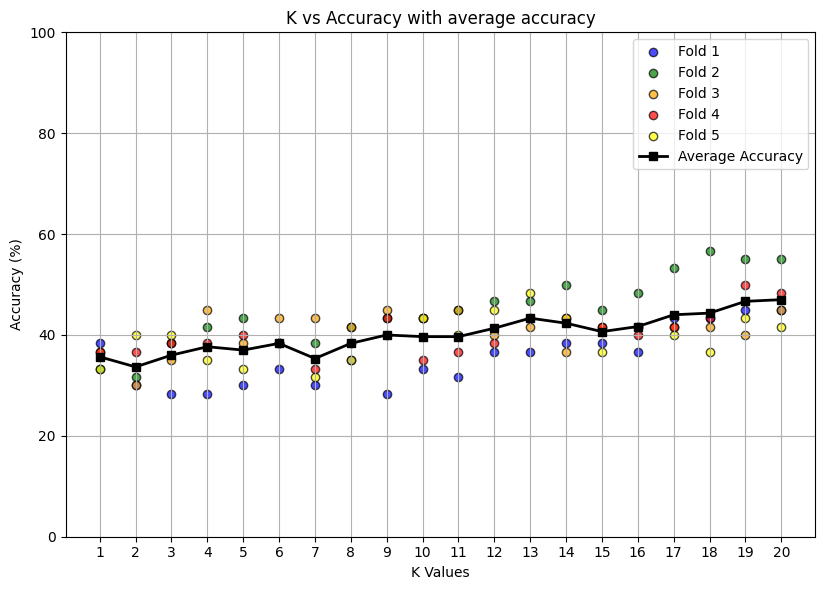

In [24]:
import matplotlib.pyplot as plt
import numpy as np

num_folds = len(next(iter(fold_accuracies.values())))

# Colors for each fold
colors = ['blue', 'green', 'orange', 'red', 'yellow']

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 2)
for fold_idx in range(num_folds):
    fold_y = [fold_accuracies[k][fold_idx] for k in k_values]
    plt.scatter(k_values, fold_y, color=colors[fold_idx], edgecolor='black', alpha=0.7, label=f'Fold {fold_idx+1}')

# Black line = average accuracy
avg_y = [average_accuracies[k] for k in k_values]
plt.plot(k_values, avg_y, color='black', marker='s', linewidth=2, label='Average Accuracy')

plt.title('K vs Accuracy with average accuracy')
plt.xlabel('K Values')
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.xticks(k_values)

plt.tight_layout()
plt.show()